First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.e

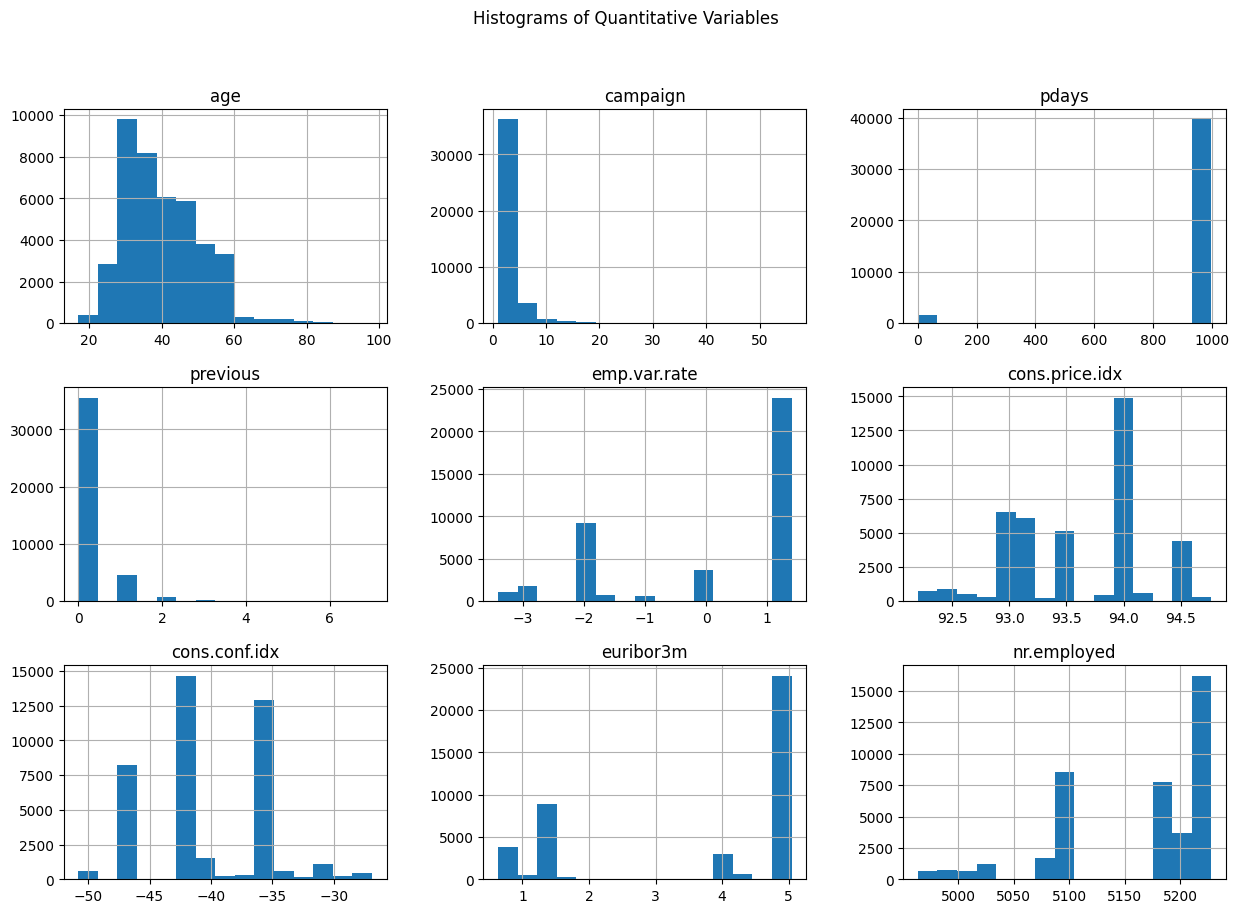

Columns 'age' or 'duration' not found in the dataset.


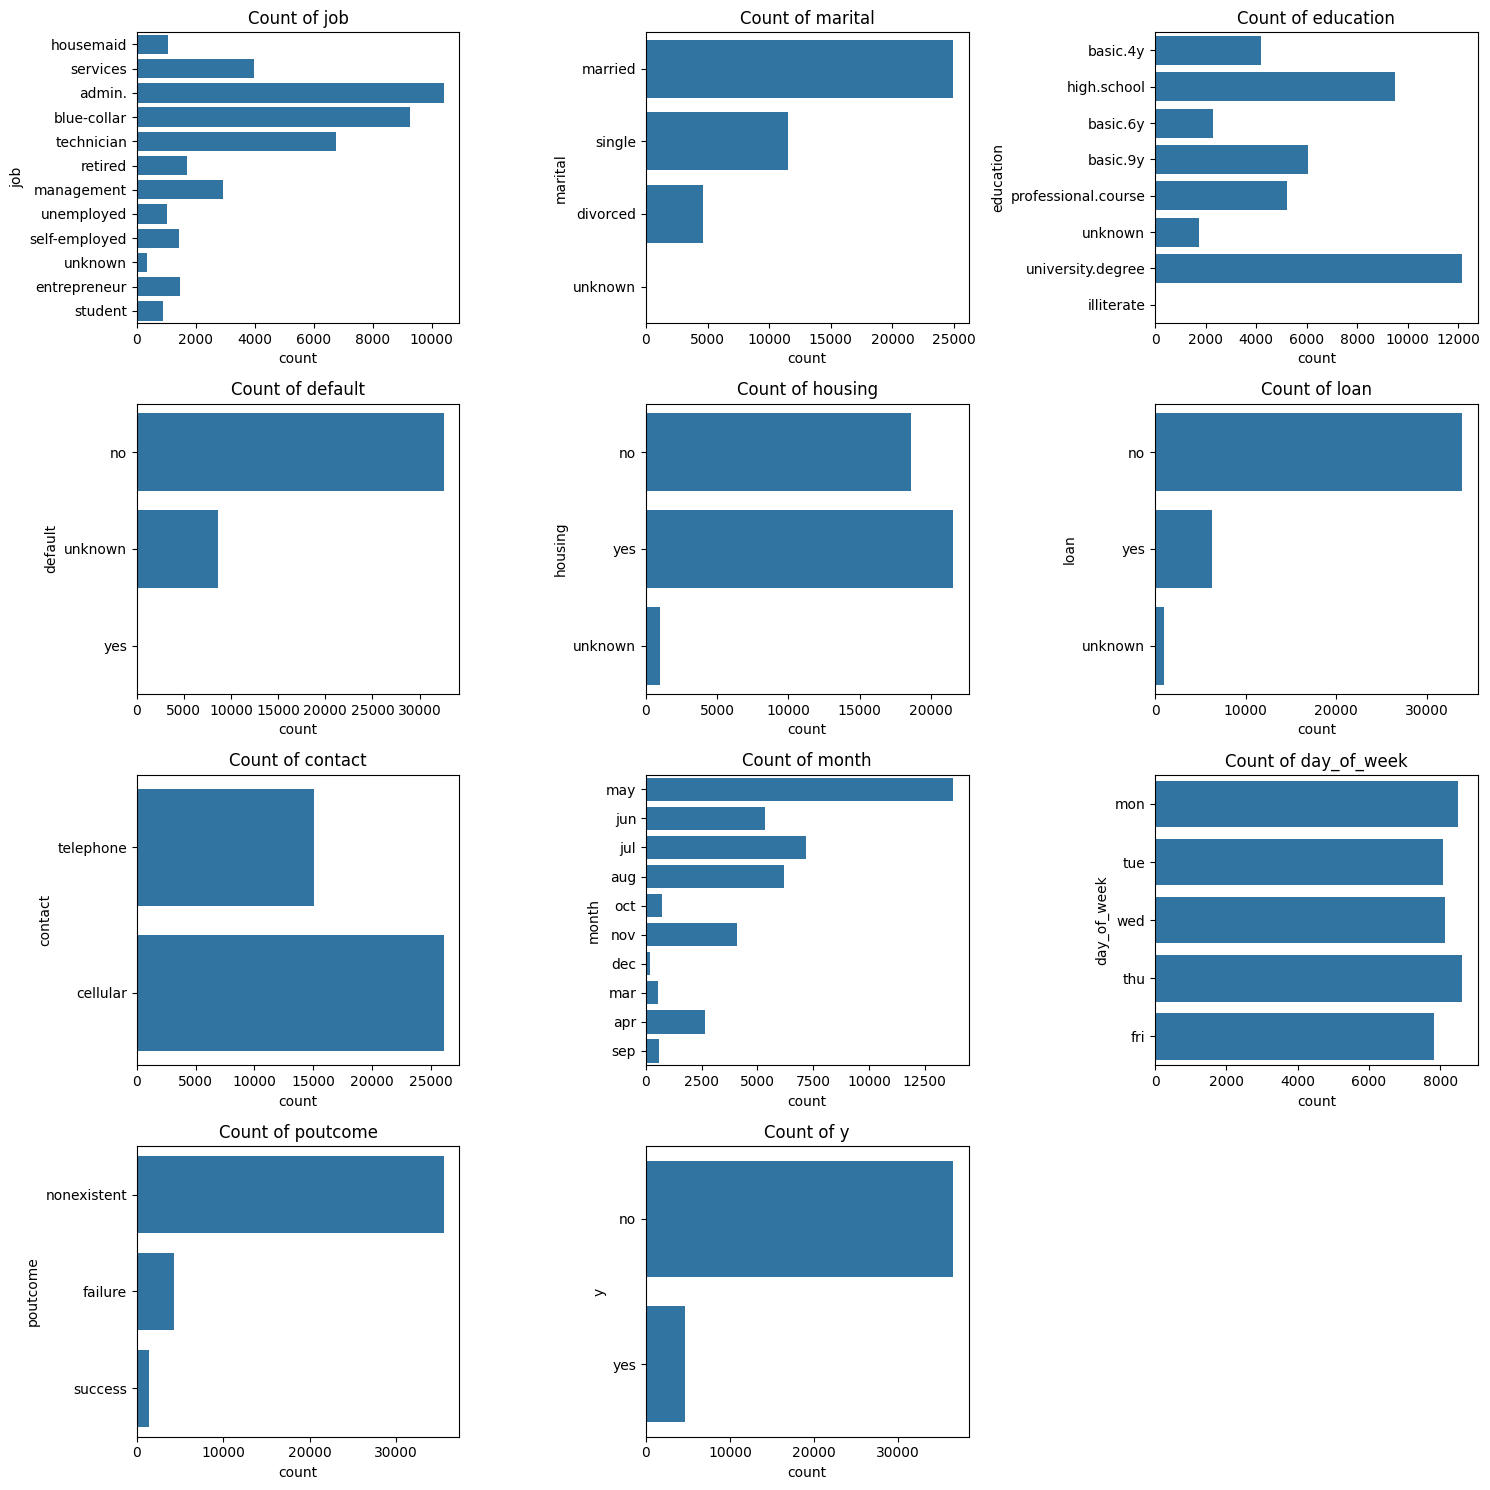

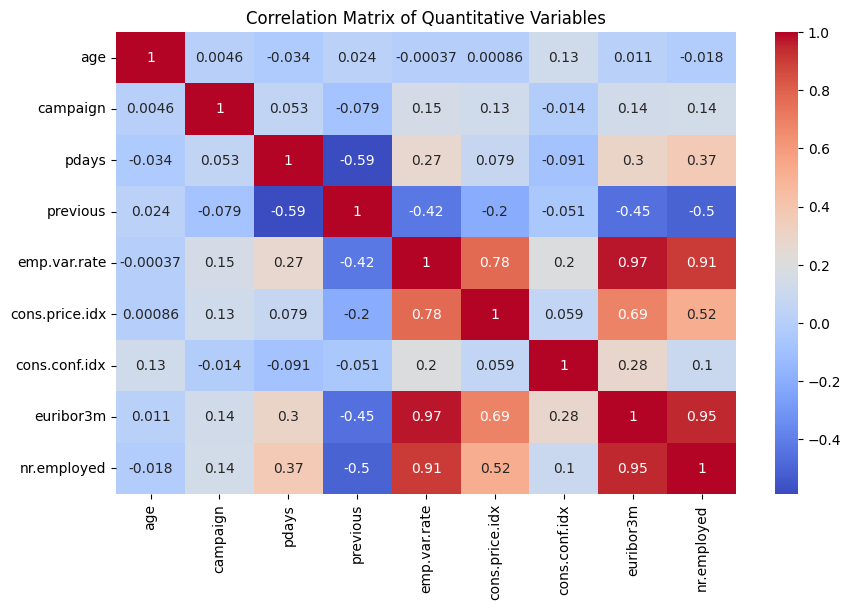

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/bank-direct-marketing-campaigns[1].csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Identify and differentiate between qualitative and quantitative data
qualitative_data = df.select_dtypes(include=['object'])
quantitative_data = df.select_dtypes(include=['number'])

print("\nQualitative data columns:")
print(qualitative_data.columns)

print("\nQuantitative data columns:")
print(quantitative_data.columns)

# Provide examples of marketing data attributes
print("\nExamples of marketing data attributes (first few rows):")
print(df.head())

# Perform Exploratory Data Analysis (EDA)
# Summary statistics for quantitative data
print("\nSummary statistics for quantitative data:")
print(quantitative_data.describe())

# Frequency distribution for qualitative data
print("\nFrequency distribution for qualitative data:")
for col in qualitative_data.columns:
    print(f"\n{col} value counts:")
    print(qualitative_data[col].value_counts())

# Visualize the distribution of quantitative variables
quantitative_data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Quantitative Variables')
plt.show()

# Check if 'age' and 'duration' columns exist before plotting
if 'age' in df.columns and 'duration' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='age', y='duration', hue='y')
    plt.title('Relationship between Age and Duration of Calls')
    plt.show()
else:
    print("Columns 'age' or 'duration' not found in the dataset.")

# Visualize the count of qualitative variables
plt.figure(figsize=(15, 15))
for i, col in enumerate(qualitative_data.columns, 1):
    plt.subplot((len(qualitative_data.columns) + 2) // 3, 3, i)
    sns.countplot(y=qualitative_data[col])
    plt.title(f'Count of {col}')
    plt.tight_layout()

plt.show()

# Correlation matrix for quantitative data
if not quantitative_data.empty:
    plt.figure(figsize=(10, 6))
    correlation_matrix = quantitative_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Quantitative Variables')
    plt.show()
else:
    print("No quantitative data available for correlation matrix.")


TASK 2

First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.e

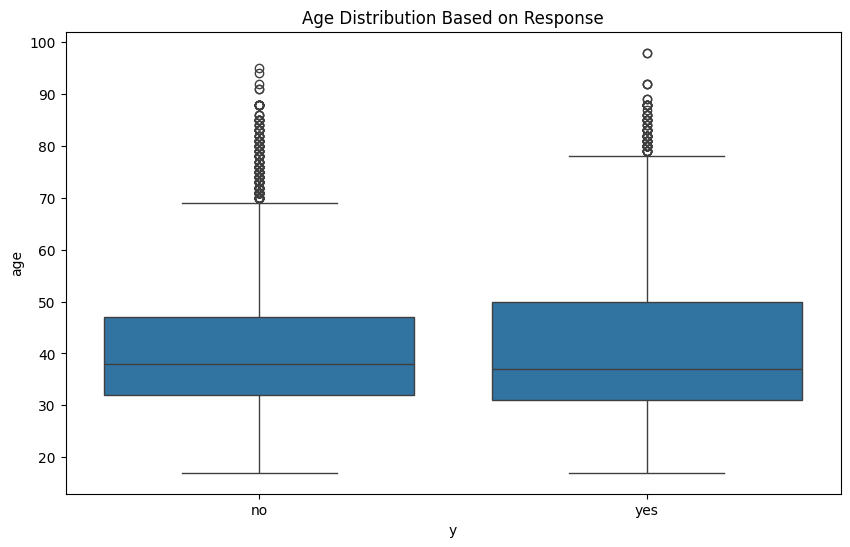

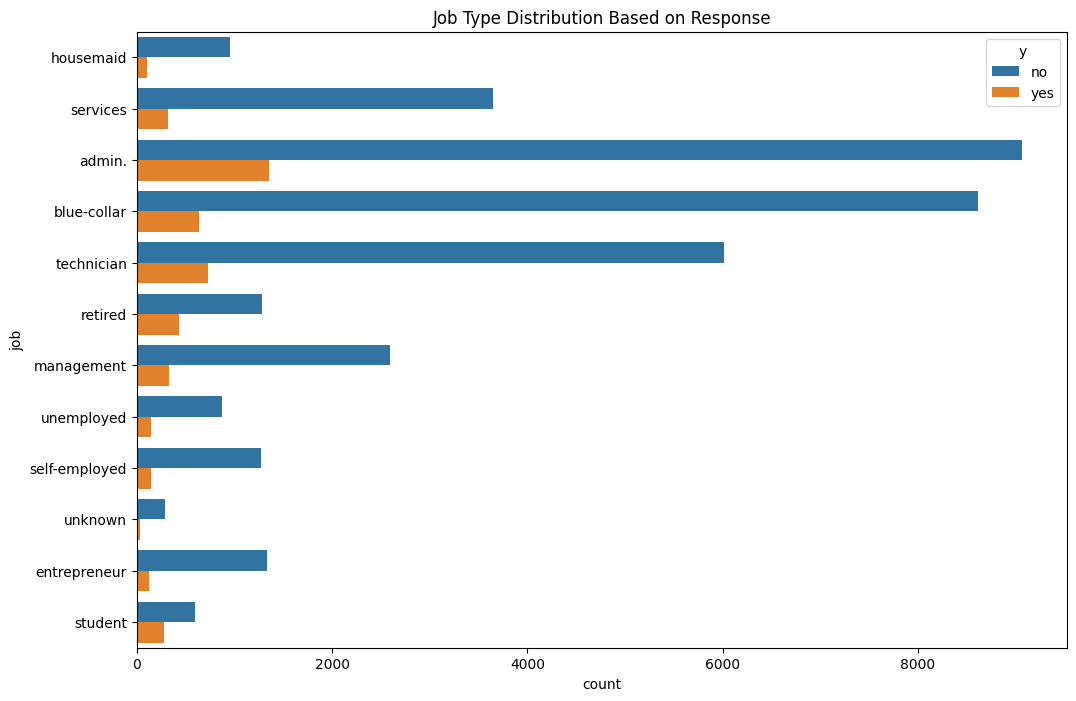

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/bank-direct-marketing-campaigns[1].csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Identify and differentiate between qualitative and quantitative data
qualitative_data = df.select_dtypes(include=['object'])
quantitative_data = df.select_dtypes(include=['number'])

print("\nQualitative data columns:")
print(qualitative_data.columns)

print("\nQuantitative data columns:")
print(quantitative_data.columns)

# Descriptive Statistics
print("\nDescriptive statistics for quantitative data:")
print(quantitative_data.describe())

# Frequency distribution for qualitative data
print("\nFrequency distribution for qualitative data:")
for col in qualitative_data.columns:
    print(f"\n{col} value counts:")
    print(qualitative_data[col].value_counts())

# Hypothesis Testing
# Example: Testing if the average age of customers is different based on the response to the marketing campaign

# Null hypothesis: The average age of customers who responded positively is equal to those who responded negatively
# Alternative hypothesis: The average age of customers who responded positively is different from those who responded negatively

# Extract data for hypothesis testing
if 'y' in df.columns and 'age' in df.columns:
    response_yes = df[df['y'] == 'yes']['age']
    response_no = df[df['y'] == 'no']['age']

    # Perform an independent t-test
    t_stat, p_value = stats.ttest_ind(response_yes, response_no)

    print(f"\nHypothesis Testing: Age difference based on response")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in the average age of customers based on their response.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in the average age of customers based on their response.")
else:
    print("Columns 'y' or 'age' not found in the dataset for hypothesis testing.")

# Additional Hypothesis Testing Examples

# Example: Testing if the job type affects the response rate
# Null hypothesis: The response rate is independent of the job type
# Alternative hypothesis: The response rate depends on the job type

if 'job' in df.columns and 'y' in df.columns:
    contingency_table = pd.crosstab(df['job'], df['y'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nHypothesis Testing: Response rate by job type")
    print(f"Chi-squared: {chi2}")
    print(f"P-value: {p}")

    if p < 0.05:
        print("Reject the null hypothesis: The response rate depends on the job type.")
    else:
        print("Fail to reject the null hypothesis: The response rate is independent of the job type.")
else:
    print("Columns 'job' or 'y' not found in the dataset for hypothesis testing.")

# Visualizations
# Box plot for age distribution based on response
if 'age' in df.columns and 'y' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y='age', data=df)
    plt.title('Age Distribution Based on Response')
    plt.show()

# Count plot for job type based on response
if 'job' in df.columns and 'y' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(y='job', hue='y', data=df)
    plt.title('Job Type Distribution Based on Response')
    plt.show()


TASK 3

Column names in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         

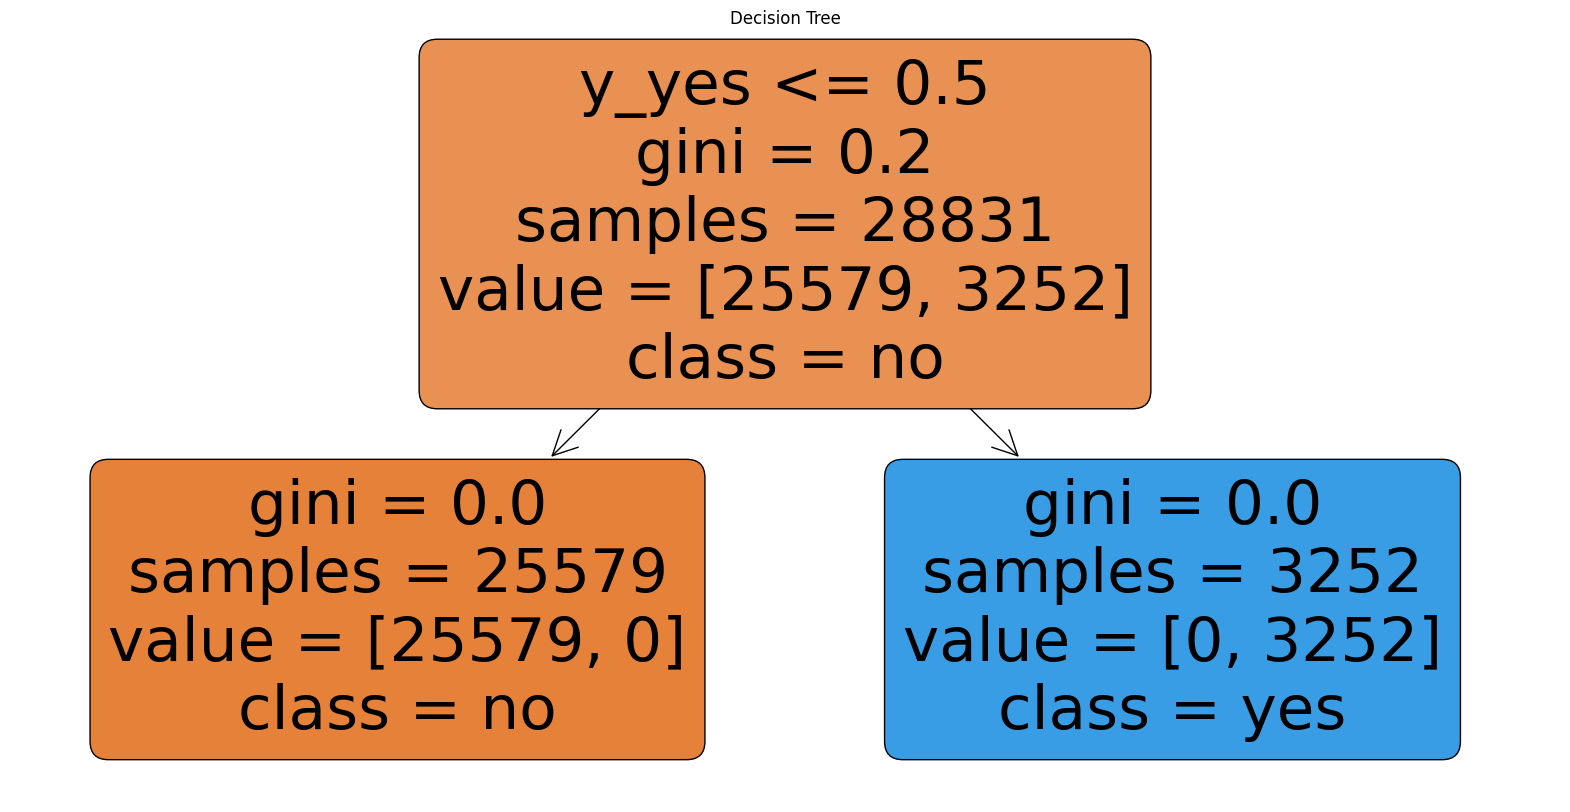

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/bank-direct-marketing-campaigns[1].csv'
df = pd.read_csv(file_path)

# Display the column names and first few rows of the dataset
print("Column names in the dataset:")
print(df.columns)

print("\nFirst few rows of the dataset:")
print(df.head())

# Assuming <target_column> is the actual column name for the target variable
target_column = 'y'  # Update this with the actual column name

# Identify and differentiate between qualitative and quantitative data
qualitative_data = df.select_dtypes(include=['object'])
quantitative_data = df.select_dtypes(include=['number'])

print("\nQualitative data columns:")
print(qualitative_data.columns)

print("\nQuantitative data columns:")
print(quantitative_data.columns)

# Factor Analysis
# Dropping any rows with missing values and encoding categorical variables
df_clean = df.dropna()

# Encode qualitative variables
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform factor analysis
fa = FactorAnalysis(n_components=5, random_state=0)
factors = fa.fit_transform(df_scaled)

print("\nFactor Analysis:")
print(factors[:5])

# Regression Model
if target_column in df.columns:
    df[target_column] = df[target_column].apply(lambda x: 1 if x == 'yes' else 0)
    X = df_encoded  # 'y' is already removed, so df_encoded is your feature matrix
    y = df[target_column]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Logistic Regression Model
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    # Evaluating the model
    print("\nLogistic Regression Model:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))
else:
    print(f"Column '{target_column}' not found in the dataset for regression model.")

# Decision Tree Model
# Predicting the target variable using a decision tree
if target_column in df.columns:
    tree_model = DecisionTreeClassifier(random_state=0)
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)

    # Evaluating the decision tree model
    print("\nDecision Tree Model:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_tree))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tree))
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred_tree))

    # Plotting the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(tree_model, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
    plt.title('Decision Tree')
    plt.show()
else:
    print(f"Column '{target_column}' not found in the dataset for decision tree model.")


task 4

Column names in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         

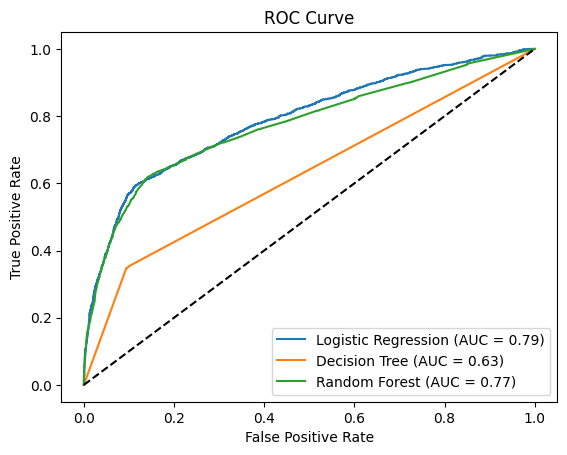

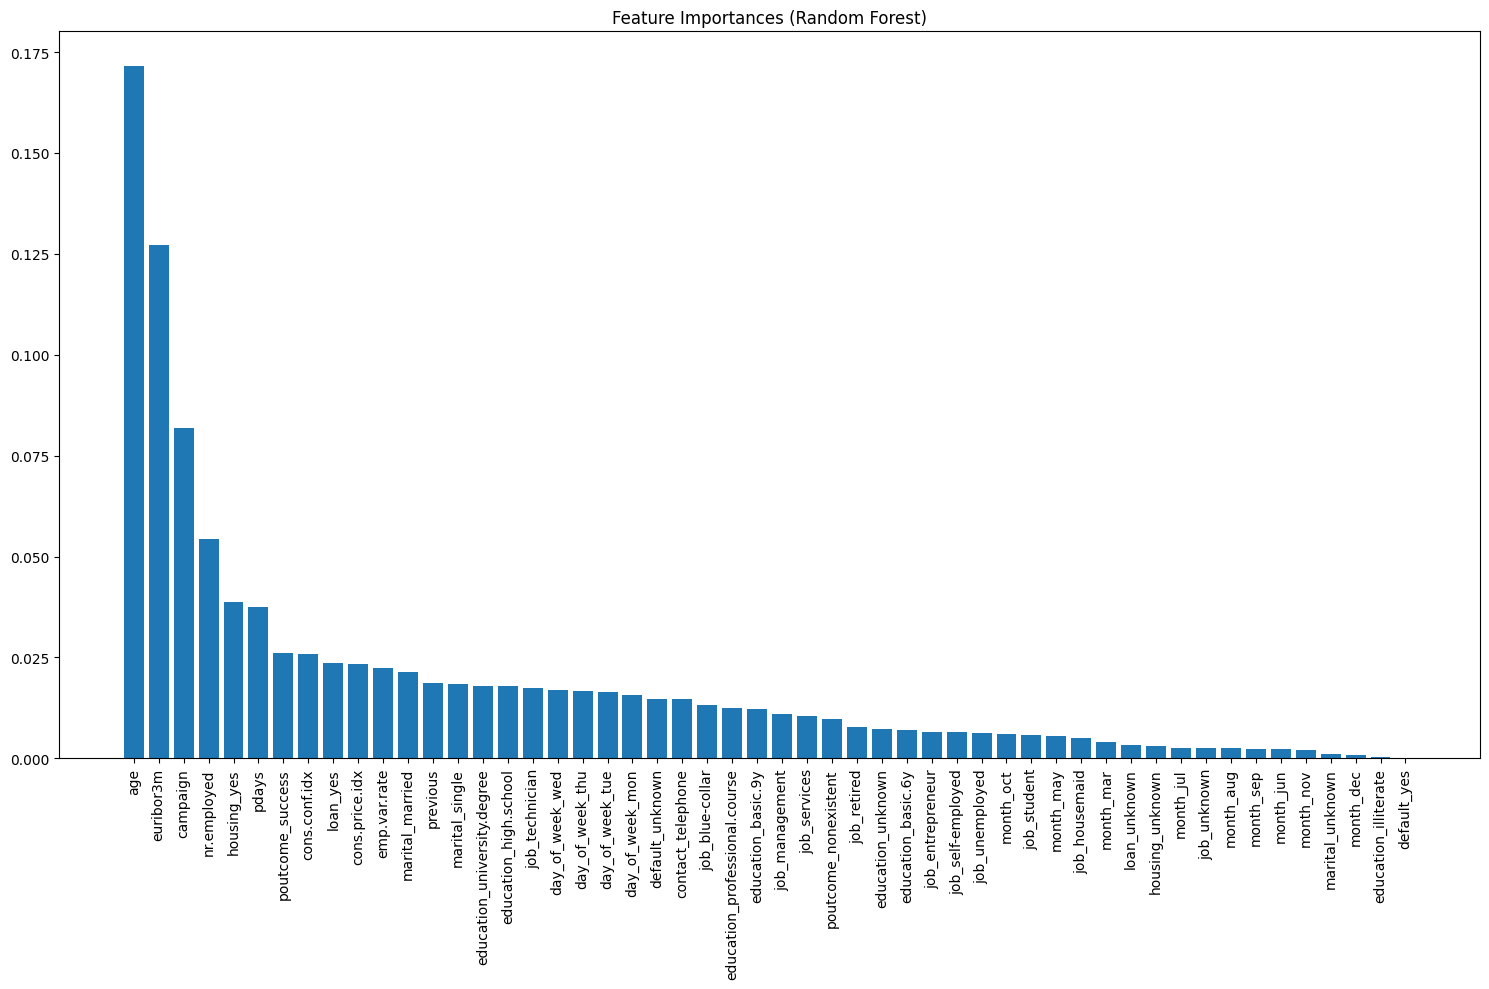

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/bank-direct-marketing-campaigns[1].csv'
df = pd.read_csv(file_path)

# Display the column names and first few rows of the dataset
print("Column names in the dataset:")
print(df.columns)

print("\nFirst few rows of the dataset:")
print(df.head())

# Preprocessing
# Encode target variable 'y'
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Drop missing values
df_clean = df.dropna()

# Encode categorical variables
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Define features and target variable
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))
    print("ROC AUC Score:")
    print(roc_auc_score(y_test, y_pred_proba))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

# Plot ROC curve for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature importance for Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(15, 10))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()
